### Codigo de frecuencia ### 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from quantecon import ARMA, periodogram, ar_periodogram



In [2]:
os.getcwd()

'/Users/apple'

In [3]:
os.chdir('/Users/apple/Documents/MEcon/Tesis-Posibles/CicloVel')
os.getcwd()

'/Users/apple/Documents/MEcon/Tesis-Posibles/CicloVel'

## JALO LA BASE DE DATOS DE LA TASA DE CRECIMIENTO DEL PBI PARA TODOS LOS PAISES AJUSTADO POR TRIMESTRE

In [4]:
OECD =pd.read_csv('PBI-OECD.csv')
OECD.head(5)


,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Period,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,Q,Quarterly,1960-Q2,Q2-1960,PC,Percentage,0,Units,NaN,NaN,2.761952,NaN,NaN
1,AUS,Australia,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,Q,Quarterly,1960-Q3,Q3-1960,PC,Percentage,0,Units,NaN,NaN,0.225553,NaN,NaN
2,AUS,Australia,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,Q,Quarterly,1960-Q4,Q4-1960,PC,Percentage,0,Units,NaN,NaN,-0.197459,NaN,NaN
3,AUS,Australia,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,Q,Quarterly,1961-Q1,Q1-1961,PC,Percentage,0,Units,NaN,NaN,0.301139,NaN,NaN
4,AUS,Australia,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,Q,Quarterly,1961-Q2,Q2-1961,PC,Percentage,0,Units,NaN,NaN,-1.096510,NaN,NaN


In [5]:
Col_drop =["FREQUENCY","PowerCode Code","PowerCode","Frequency","Period","Unit Code","Unit","Reference Period Code","Reference Period","Flag Codes","Flags"]
OECD =OECD.drop(Col_drop,axis=1)
OECD.head(4)

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,TIME,Value
0,AUS,Australia,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1960-Q2,2.761952
1,AUS,Australia,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1960-Q3,0.225553
2,AUS,Australia,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1960-Q4,-0.197459
3,AUS,Australia,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1961-Q1,0.301139


In [6]:
OECD.loc[OECD['TIME'].str.slice(-3) == '-Q1', 'YearC'] = (OECD["TIME"].str.slice(stop=4)).astype(float) 
OECD.loc[OECD['TIME'].str.slice(-3) == '-Q2', 'YearC'] = (OECD["TIME"].str.slice(stop=4) + ".25").astype(float) 
OECD.loc[OECD['TIME'].str.slice(-3) == '-Q3', 'YearC'] = (OECD["TIME"].str.slice(stop=4) + ".50").astype(float) 
OECD.loc[OECD['TIME'].str.slice(-3) == '-Q4', 'YearC'] = (OECD["TIME"].str.slice(stop=4) + ".75").astype(float) 

In [7]:
OECD["YEAR"] = OECD["TIME"].str.slice(stop=4).astype(int)

In [8]:
OECD["YearC"]

0        1960.25
1        1960.50
2        1960.75
3        1961.00
4        1961.25
          ...   
74324    2020.00
74325    2020.25
74326    2020.50
74327    2020.75
74328    2021.00
Name: YearC, Length: 74329, dtype: float64

In [9]:
USA = OECD.loc[OECD["LOCATION"] == "USA"]
print(len(USA["Value"]))
USA = USA.loc[USA["SUBJECT"]=="B1_GE"]
print(len(USA["Value"]))

USA_GPSA = USA.loc[USA["MEASURE"] == "GPSA"]
USA_GYSA = USA.loc[USA["MEASURE"] == "GYSA"]

print(len(USA_GPSA["Value"])/4)

5478
589
74.0


## ME QUEDO SOLO CON LA DATA DE ESTADOS UNIDOS


In [10]:
USA.head(5)

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,TIME,Value,YearC,YEAR
8671,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1947-Q2,-0.266691,1947.25,1947
8672,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1947-Q3,-0.206496,1947.50,1947
8673,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1947-Q4,1.564208,1947.75,1947
8674,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1948-Q1,1.504256,1948.00,1948
8675,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1948-Q2,1.650658,1948.25,1948


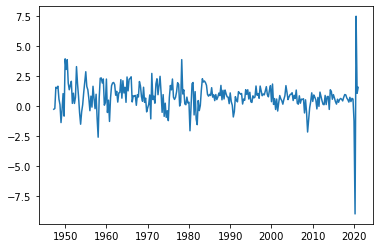

In [11]:
plt.plot(USA_GPSA["YearC"],USA_GPSA["Value"])

# EL GRÁFICO DE ARRIBA MUESTRA LA TASA DE CRECIMIENTO DEL PBI CON RESPECTO A SU NIVEL TRIMESTRAL ANTERIOR ESTA SERIE VA PARA 1960 HASTA 2021, SOLO PARA ESTADOS UNIDOS. COMO SE PUEDE VER EN EL 2020 ESTA LA GRAN CAIDA POR EL CORONAVIRUS Y LA RAPIDA RECUPERACION


In [53]:
####AAAAAAAAAAAAAAAAAAAAAAAA######

# AHORA DIVIDIRE LA DATA EN 3 SECCIONES Y ELABORARE UN ANÁLISIS DE FRECUENCIA (UTILIZANDO PERIODOGRAMA) PARA HALLAR LAS MAGNITUDES Y CADA CUANTO SE REPITE CADA CICLO ; PARA ESTO LA DATA SERA DIVIDIDA EN UNA ËPOCA PRE INTERNET, LA EPOCA DE SURGIMIENTO DE INTERNET; Y LAS 2 ULTIMAS DECADAS

### DIVIDIRE LA DATA EN 3 SECCIONES ##
1940 - 1990
1990 - 2000
2000 - 2020

In [12]:
#### Sección 1 ####
USA_GPSA1= USA_GPSA.loc[USA_GPSA["YearC"] <= 1990]
USA_GPSA1.tail(5)

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,TIME,Value,YearC,YEAR
8838,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1989-Q1,1.016602,1989.00,1989
8839,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1989-Q2,0.763269,1989.25,1989
8840,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1989-Q3,0.740881,1989.50,1989
8841,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1989-Q4,0.197047,1989.75,1989
8842,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1990-Q1,1.092790,1990.00,1990


# ESTE ES EL RATIO/TASA DE CRECIMIENTO(CON RESPECTO AL PERIODO ANTERIOR) DEL AÑO 1950 AL AÑO 1990

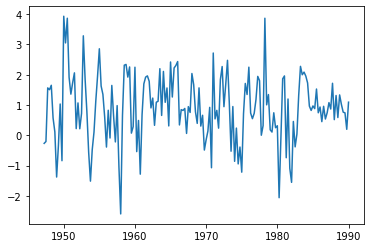

In [13]:
plt.plot(USA_GPSA1["YearC"],USA_GPSA1["Value"])

In [14]:
#### Seccion 2 ###
USA_GPSA2= USA_GPSA.loc[(USA_GPSA["YearC"] > 1990) & (USA_GPSA["YearC"] <=2000)]
USA_GPSA2.tail(5)

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,TIME,Value,YearC,YEAR
8878,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1999-Q1,0.946472,1999.00,1999
8879,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1999-Q2,0.769159,1999.25,1999
8880,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1999-Q3,1.309665,1999.50,1999
8881,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,1999-Q4,1.699585,1999.75,1999
8882,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,2000-Q1,0.361760,2000.00,2000


# ESTE ES EL RATIO/TASA DE CRECIMIENTO(CON RESPECTO AL PERIODO ANTERIOR) DEL AÑO 1990 AL AÑO 2000

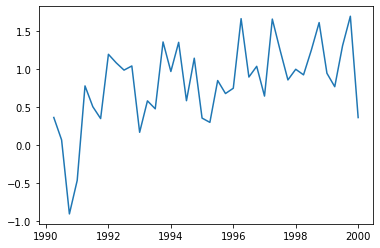

In [15]:
plt.plot(USA_GPSA2["YearC"],USA_GPSA2["Value"])

In [16]:
#### Seccion 3 ###
USA_GPSA3= USA_GPSA.loc[USA_GPSA["YearC"] >= 2000]
USA_GPSA3.tail(5)

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,TIME,Value,YearC,YEAR
8962,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,2020-Q1,-1.262655,2020.00,2020
8963,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,2020-Q2,-8.986117,2020.25,2020
8964,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,2020-Q3,7.478741,2020.50,2020
8965,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,2020-Q4,1.064204,2020.75,2020
8966,USA,United States,B1_GE,Gross domestic product - expenditure approach,GPSA,Growth rate based on seasonally adjusted volum...,2021-Q1,1.553381,2021.00,2021


# ESTE ES EL RATIO/TASA DE CRECIMIENTO(CON RESPECTO AL PERIODO ANTERIOR) DEL AÑO 2000 AL AÑO 2020


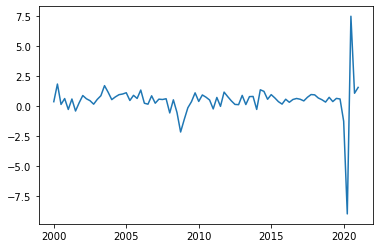

In [17]:
plt.plot(USA_GPSA3["YearC"],USA_GPSA3["Value"])

In [18]:
from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack

# LUEGO DE ESTO PLOTEO A LAS SEÑALES CON UN PERIODOGRAMA EN EL CUAL SE VA A MOSTRAR LA AMPLITUD DE LA SEÑAL Y SU FRECUENCIA EN LA QUE OCURRE PARA ESTE CASO LA FRECUENCIA DE MEUSTREO SERÁ 4 MUESTRAS POR AÑO #

Text(0, 0.5, 'Spectrum Amplitude')

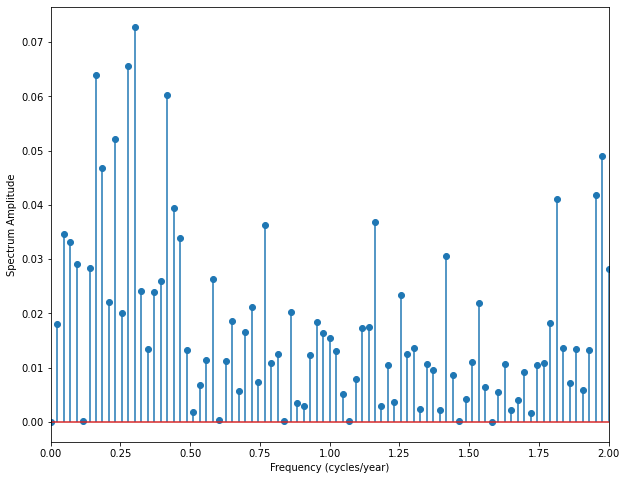

In [49]:
fs=4
f1, Px1 = signal.periodogram(USA_GPSA1["Value"], fs = fs, window='hanning', scaling='spectrum')
plt.figure(figsize = (10, 8))
plt.stem(f1, Px1,use_line_collection=True)
plt.xlim(0,2)
#plt.yscale('log')
plt.xlabel('Frequency (cycles/year)')
plt.ylabel('Spectrum Amplitude')

Text(0, 0.5, 'Spectrum Amplitude')

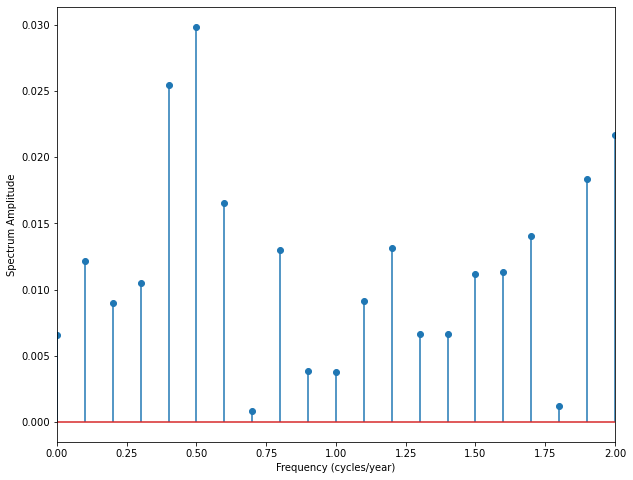

In [50]:
f2, Px2 = signal.periodogram(USA_GPSA2["Value"], fs = fs, window='hanning', scaling='spectrum')
plt.figure(figsize = (10, 8))
plt.stem(f2, Px2,use_line_collection=True)
plt.xlim(0,2)
#plt.yscale('log')
plt.xlabel('Frequency (cycles/year)')
plt.ylabel('Spectrum Amplitude')

Text(0, 0.5, 'Spectrum Amplitude')

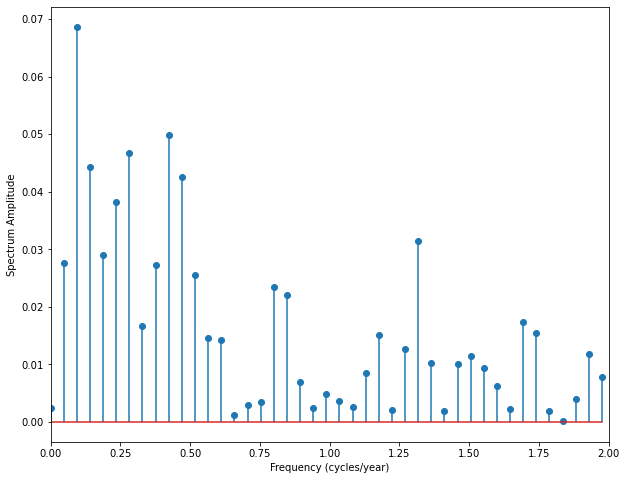

In [51]:
f3, Px3 = signal.periodogram(USA_GPSA3["Value"], fs = fs, window='hanning', scaling='spectrum')
plt.figure(figsize = (10, 8))
plt.stem(f3, Px3,use_line_collection=True)
plt.xlim(0,2)
#plt.yscale('log')
plt.xlabel('Frequency (cycles/year)')
plt.ylabel('Spectrum Amplitude')

# LUEGO DE HACER ESTO DISCRIMINAMOS POR LOS 5 VALORES DE AMPLITUD MAS ALTOS Y CONTRASTAMOS CON SU FRECUENCIA DE OCURRENCIA ; PARA LOS 3 PERIODOS EN ESE ORDEN , CON ESTO OBTENEMOS CUANTO DURARIA CADA CICLO EN LOS 3 INTERVALOS DE TIEMPO,

## Aqui podemos encontrar que en el primer periodo existen ciclos economicos cada 3 años y medios y un ciclo cada 6 y un ciclo cada 2 años y medio

In [54]:
for amp_arg in np.argsort(np.abs(Px1))[::-1][0:4]:
    year = 1 / f1[amp_arg]
    print(year)

3.307692307692308
3.5833333333333335
6.142857142857142
2.3888888888888893


## Aqui los ciclos parece que duran mucho menos (Periodo del años 1990 al año 2000)

In [55]:
for amp_arg in np.argsort(np.abs(Px2))[::-1][0:4]:
    year = 1 / f2[amp_arg]
    print(year)

2.0
2.5
0.5
0.5263157894736842


# Aaqui tenemos el ciclo de 3 años y medio tambien, el ciclo de 10 años personalemtne no lo consideraria por que es el shock ocasionado por el covid

In [56]:
for amp_arg3 in np.argsort(np.abs(Px3))[::-1][0:4]:
    year = 1 / f3[amp_arg3]
    print(year)

10.625
2.361111111111111
3.5416666666666665
7.083333333333333
